# 1) Interpretation and Significance

In [17]:
# expenditure = 873 + 0.0012annual_income + 0.00002annual_income^2 - 223.57have_kids

In [ ]:
# The statistical significancy of the coefficients is the required thing that is not stated in the question. Even though the 
# coefficients seem different from zero, if they are statistically insignificant, then they should be considered as zero. 
# Therefore, t-statistics or the associated p-values should be provided and with the assumption that all the estimated 
# coefficients are statistically significant the model can be interpreted as follows. 873 is the bias term and interpreting it 
# is hard due to the reasons that were talked about. Therefore, it is said to be the bias term.The families with children spend 
# $223.57 less than the families without children on average and the relation between the income and the recreation expenditure 
# is quadratic. An increase of $1000 in annual income increases the recreation expenditure by $1.2 and by an additional 
# 0.02 X annual income. This comes from the relation between the square of the annual income and the recreation expenditure. 
# The second part is expressed as 0.02 X annual income because the exact value depends on the income level. The magnitude of 
# the second term increases as the level of X increases because the relationship is quadratic. The following graph shows the 
# relation between the annual income and the annual recreation expenditure separately for the families with children and the 
# families without children.

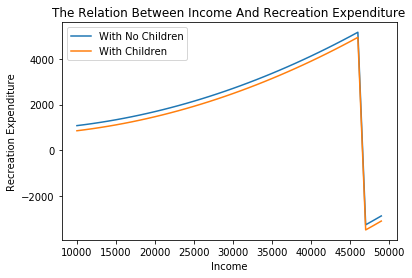

In [37]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(10000, 50000, 1000)

Y = 873 + 0.0012*X + 0.000002*(X**2)

Y_kids = (873 - 223.57) + 0.0012*X + 0.000002*(X**2)


plt1 = plt.plot(X, Y, label="With No Children")
plt2 = plt.plot(X, Y_kids, label="With Children")
plt.xlabel("Income")
plt.ylabel("Recreation Expenditure")
plt.title("The Relation Between Income And Recreation Expenditure")
plt.legend()
plt.show()

# 2) Weather Model

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

In [21]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con = engine)

engine.dispose()

In [22]:
Y = weather_df['apparenttemperature'] - weather_df['temperature']

X = weather_df[['humidity','windspeed']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:26:43   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the estimated coefficients are statistically significant because their p-values are much less than 0.05.
It can be expected that as humidity increases the difference between the temperature and the apparent temperature increases 
as well, but the estimations say that the sign of the coefficient of the humidity is negative. It might also be expected 
that the difference of the temperature and the apparent temperature negatively related with the windspeed as the 
estimation says. An increase of 1 point in the humidity results in a decrease of 3.03 points in the target as the estimated 
model says. An increase of 1 point in the windspeed is linked with a decrease of 0.12 point in the target.

In [24]:
weather_df['humidity_windspeed_interaction'] = weather_df.humidity * weather_df.windspeed

Y = weather_df['apparenttemperature'] - weather_df['temperature']

X = weather_df[['humidity','windspeed', 'humidity_windspeed_interaction']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:26:43   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0839      0.033      2.511      0.012       0.018       0.149
humidity                           0.1775      0.043      4.133      0.000       0.093       0.262
windspeed                          0.0905      0.002     36.797      0.000       0.086       0.095
humidity_windspeed_interaction    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the coefficients are statistically significant because their p-values are less than 0.05. The signs of both the windspeed 
humidity shifted from negative to positive when the interaction term is included. An increase of 1 point in the windspeed and 
humidity results in 0.09 and 0.18 point increases in the target, respectively, as said by the model. The coefficient of the 
interaction term is -0.30 as said by the model and it can be interpreted as follows: given a windspeed level, a 1 point 
increase in humidity results in a 0.18 - 0.30 X windspeed point increase in the target and this means that the increase in 
the target is lower for high windspeed values than it is for low windspeed values. Therefore, the windspeed reduces the effect 
of humidity increase on the target. For a given humidity level, an increase of 1 point in the windspeed results in 
a 0.09 - 0.30 X humidity point increase in the target. Therefore, the humidity reduces the effect of windspeed on the target 
as well.

# 3) House Prices Model

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [27]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con = engine)

engine.dispose()

In [28]:
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)

In [29]:
Y = house_prices_df['saleprice']

X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:26:47   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      0.000   -1.53e+05   -8.19e+04
overallqual  2.333e+04   1088.506     21.430      0.000    2.12e+04    2.55e+04
grlivarea      45.6344      2.468     18.494      0.000      40.794      50.475
garagecars   1.345e+04   2990.453      4.498      0.000    7584.056    1.93e+04
garagearea     16.4082     10.402      1.577      0.115      -3.997      36.813
totalbsmtsf    28.3816      2.931      9.684      0.000      22.633      34.131
mszoning_FV  2.509e+04   1.37e+04      1.833      0.067   -1761.679    5.19e+04
mszoning_RH  1.342e+04   1.58e+04      0.847      0.397   -1.77e+04    4.45e+04
mszoning_RL  2.857e+04   1.27e+04      2.246      0.025    3612.782    5.35e+04
mszoning_RM  9047.7894   1.29e+04      0.702      0.483   -1.62e+04    3.43e+04
street_Pave   151.0376   1.63e+04      0.009      0.993   -3.18e+04    3.21e+04
==============================================================================
Omnibus:                      415.883   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41281.526
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                      29.049   Cond. No.                     5.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# The statistically significant variables are mszoning_FV, mszoning_RL, overallqual, totalbsmtsf, grlivarea, and garagecars. 
# All the other variables are statistically insignificant; therefore, their coefficients are statistically zero. The estimation 
# results are as follows: the average sale price is higher in mszoning_RL and mszoning_FV than the base zone by $28570 and 
# $25090, respectively; a 1 point increase in overallqual results in a $23330 increase in sale price; a 1 point increase in 
# totalbsmtsf results in a $28.3816 increase in sale price; a 1 point increase in grlivarea results in a $45.6344 increase in 
# sale price; and a 1 point increase in garagecars results in a $13450 increase in sale price.

In [31]:
Y = house_prices_df['saleprice']

X = house_prices_df[['mszoning_FV', 'mszoning_RL', 'overallqual', 'totalbsmtsf', 'grlivarea', 'garagecars']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     803.3
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:26:47   Log-Likelihood:                -17476.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1453   BIC:                         3.500e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.087e+05   4792.537    -22.674      0.000   -1.18e+05   -9.93e+04
mszoning_FV  1.679e+04   5560.901      3.020      0.003    5885.005    2.77e+04
mszoning_RL  1.968e+04   2833.445      6.946      0.000    1.41e+04    2.52e+04
overallqual  2.332e+04   1078.278     21.628      0.000    2.12e+04    2.54e+04
totalbsmtsf    29.3276      2.858     10.261      0.000      23.721      34.934
grlivarea      45.9659      2.452     18.743      0.000      41.155      50.777
garagecars   1.721e+04   1732.720      9.931      0.000    1.38e+04    2.06e+04
==============================================================================
Omnibus:                      406.420   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37605.498
Skew:                          -0.057   Prob(JB):                         0.00
Kurtosis:                      27.863   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The results look like the results of the previous model and the estimated coefficients are close to the previous model save 
for the dummy variables. The coefficients of the dummies became relatively bigger than the other variables did. Taking the 
results into account, the most noticeable factors affecting the sale price appear to be the mszoning and the overallqual.